In [2]:
import sim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [30]:
ns = 2**np.arange(4,15) * 128

print(max(ns))
xs = []
float2s = []
float4s = []

ray = sim.utils.ray(np.array([1,0,0]),2,25)

float2 = np.zeros_like(ns)
float4 = np.zeros_like(ns)

repeats = 5

idx = 0
for n in tqdm(ns):
    df = sim.halos.Sample.Uniform(n)

    float2mean = 0
    float4mean = 0

    for i in range(repeats):
        xs.append(n)
        output,time = sim.static_solver.evaluate(ray,df,precision="f2-smcuda")
        float2s.append(time)
        float2mean += time
        output,time = sim.static_solver.evaluate(ray,df,precision="f4-smcuda")
        float4s.append(time)
        float4mean += time

    float2[idx] = float2mean/repeats
    float4[idx] = float4mean/repeats

    #output,time = sim.static_solver.evaluate(ray,df,precision="f8")
    #float8[idx] = time
    
    idx += 1

2097152


100%|██████████| 11/11 [00:12<00:00,  1.14s/it]


In [9]:
def plot_pretty(dpi=150,fontsize=15):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 4]

plot_pretty()

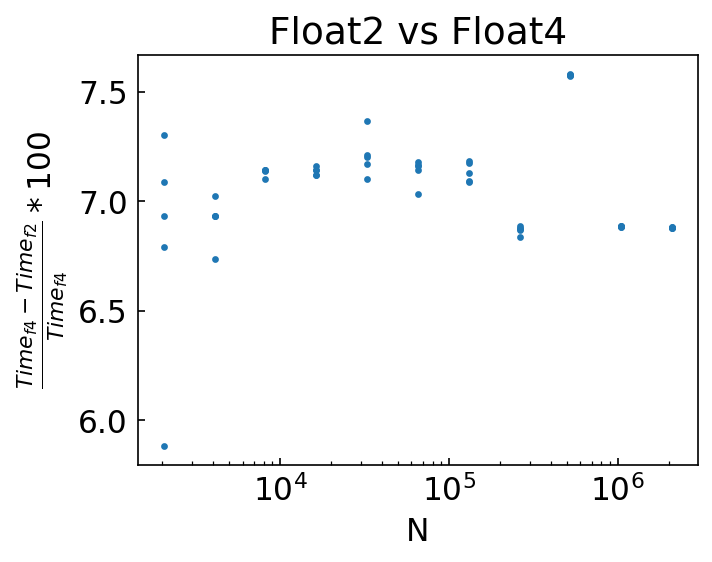

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(xs,100*((np.array(float4s) - np.array(float2s))/np.array(float4s)),label="half",s=5)
#ax.scatter(xs,np.array(float4s))
#ax.plot(ns,100*((float4 -float2)/float4),label="double")
ax.set_xscale('log')
#ax.set_yscale('log')
#ax.yaxis.set_major_locator(plt.LogLocator(numticks=7,subs="auto"))
ax.set_ylabel(r"$\frac{Time_{f4} - Time_{f2}}{Time_{f4}} * 100$")
ax.set_xlabel("N")
ax.set_title("Float2 vs Float4")
plt.tight_layout()
plt.savefig("plots/general/fixed_execution_time.jpg")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(ns,float2,label="half")
ax.plot(ns,float4,label="single")
ax.plot(ns,float8,label="double")
ax.set_xscale('log')
ax.set_yscale('log')
#ax.yaxis.set_major_locator(plt.LogLocator(numticks=7,subs="auto"))
ax.set_ylabel(r"Time ($\mu s$)")
ax.set_xlabel("N")
ax.legend()
ax.set_title("Execution Time")
plt.tight_layout()
#plt.savefig("execution_time.jpg")
plt.show()